In [1]:
import cv2
import keras
import keras.losses

from getABSDData import getABSDDataMask
from Utilities.Metrics import precision, recall, f1
from Model import RetrainedClassificationModel

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
keras.metrics.precision = precision
keras.metrics.recall = recall
keras.metrics.f1 = f1

In [3]:
# model = keras.models.load_model('1024.hd5')
# model = RetrainedClassificationModel('noname')
# model.load('tcm.212-0.15.hdf5')

In [13]:
n_training_images = 4
image_size = 224
# image_converter = lambda x: x/255
# training, dev, _ = getABSDDataMask(n_training_images, image_converter=image_converter, remove_nan=True, reduced_size=100)
label_converter = lambda x: cv2.resize(x, (image_size, image_size))
image_converter = lambda x: keras.applications.vgg16.preprocess_input(label_converter(x))

training, dev, _ = getABSDDataMask(n_training_images, label_converter=label_converter, image_converter=image_converter,
                                   reduced_size=16, remove_nan=True)

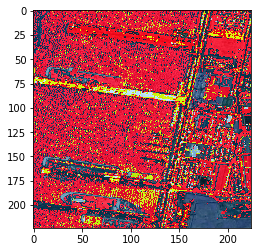

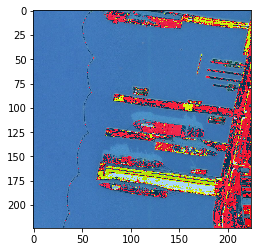

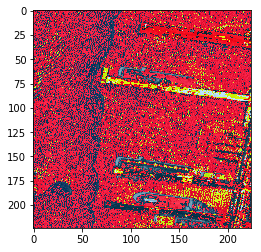

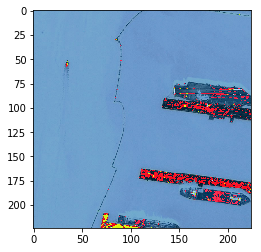

In [14]:
i, m = training[1]
import matplotlib .pyplot as plt
import numpy as np
for id in range(n_training_images):
    plt.imshow((i[id, :, :, :] * 255).astype(np.uint8))
    plt.show()
#     plt.imshow(m[id, :].reshape((image_size, image_size)))
#     plt.show()

In [6]:

training, dev, _ = getABSDDataMask(n_training_images, label_converter=label_converter, image_converter=image_converter,
                                   reduced_size=10, remove_nan=True)

In [7]:
len(training)

2

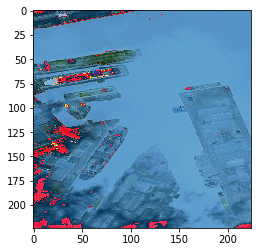

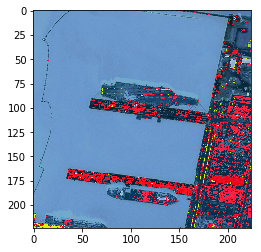

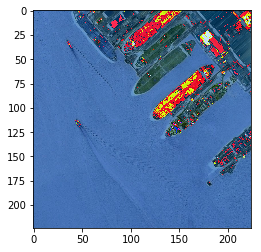

IndexError: index 3 is out of bounds for axis 0 with size 3

In [12]:
i, m = training[1]
import matplotlib .pyplot as plt
import numpy as np
for id in range(n_training_images):
    plt.imshow((i[id, :, :, :] * 255).astype(np.uint8))
    plt.show()
#     plt.imshow(m[id, :].reshape((image_size, image_size)))
#     plt.show()

In [9]:
p = model.model.predict(i, batch_size=2)
for id in range(n_training_images):
    plt.imshow((p[id, :]/p[id, :].max()).reshape((image_size, image_size)) > 0.5)
    plt.show()

NameError: name 'model' is not defined

In [ ]:
plt.plot(hst.history['loss'])
plt.show()

In [ ]:
plt.plot(p[id, :]/p[id, :].max())

In [ ]:
p[id, :].max()

In [ ]:
from getABSDData import getABSDDataFrames

In [ ]:
t, d, v =getABSDDataFrames()

In [ ]:
df = t.groupby('ImageId')['Area'].sum()

In [ ]:
i = df.sort_values(ascending=False).index.tolist()

In [ ]:
    i[:10].tolist()

In [ ]:
df[:1000]

In [ ]:
df